In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing data 
df1 = pd.read_csv('/Users/joeyposillico/Desktop/data mining final project/Depression Student Dataset 2.csv')
df1.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


In [3]:
#checking the size of the dataset
df1.shape

(502, 11)

In [4]:
#checking the names of each of the columns
df1.columns

Index(['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [5]:
#checking data types of each of the columns
df1.dtypes

Gender                                    object
Age                                        int64
Academic Pressure                        float64
Study Satisfaction                       float64
Sleep Duration                            object
Dietary Habits                            object
Have you ever had suicidal thoughts ?     object
Study Hours                                int64
Financial Stress                           int64
Family History of Mental Illness          object
Depression                                object
dtype: object

# Pre Processing

#### 1) Check for null values 

In [6]:
#checking for null values 
df1.isnull().sum()

Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

- no null values exist so nothing needs to be changed to address this step. 

#### 2) Change our target variable "depression" to an int value (no values will equal 0 and yes values will equal 1)

In [7]:
# Convert all values in the Depression column to lowercase 
df1['Depression'] = df1['Depression'].str.lower()

# Replace 'yes' with 1 and 'no' with 0, and convert to int so that it can be used in our model 
df1['Depression'] = df1['Depression'].replace({'yes': 1, 'no': 0}).astype(int)

In [8]:
#checking to make sure that the data type of the column has been changed
print("the data type is : " + str(df1['Depression'].dtype)) 
#making sure the data has been changed
df1.head()

the data type is : int64


,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,0
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,0
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,1
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,0
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,0


#### 3) Convert data types using get dummies so that they can be used on our model

In [9]:
# Apply one-hot encoding to categorical variables
df1_encoded = pd.get_dummies(df1, drop_first=True)

# Display the first few rows of the encoded DataFrame
df1_encoded.head()


,Age,Academic Pressure,Study Satisfaction,Study Hours,Financial Stress,Depression,Gender_Male,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,28,2.0,4.0,9,2,0,True,True,False,False,True,False,True,True
1,28,4.0,5.0,7,1,0,True,False,False,False,False,False,True,True
2,25,1.0,3.0,10,4,1,True,False,False,False,False,True,True,False
3,23,1.0,4.0,7,2,0,True,False,False,True,False,True,True,True
4,31,1.0,5.0,4,2,0,False,False,False,True,False,False,True,True


#### 4) checking distribution of each of the features to make sure they are close to normal distribution 

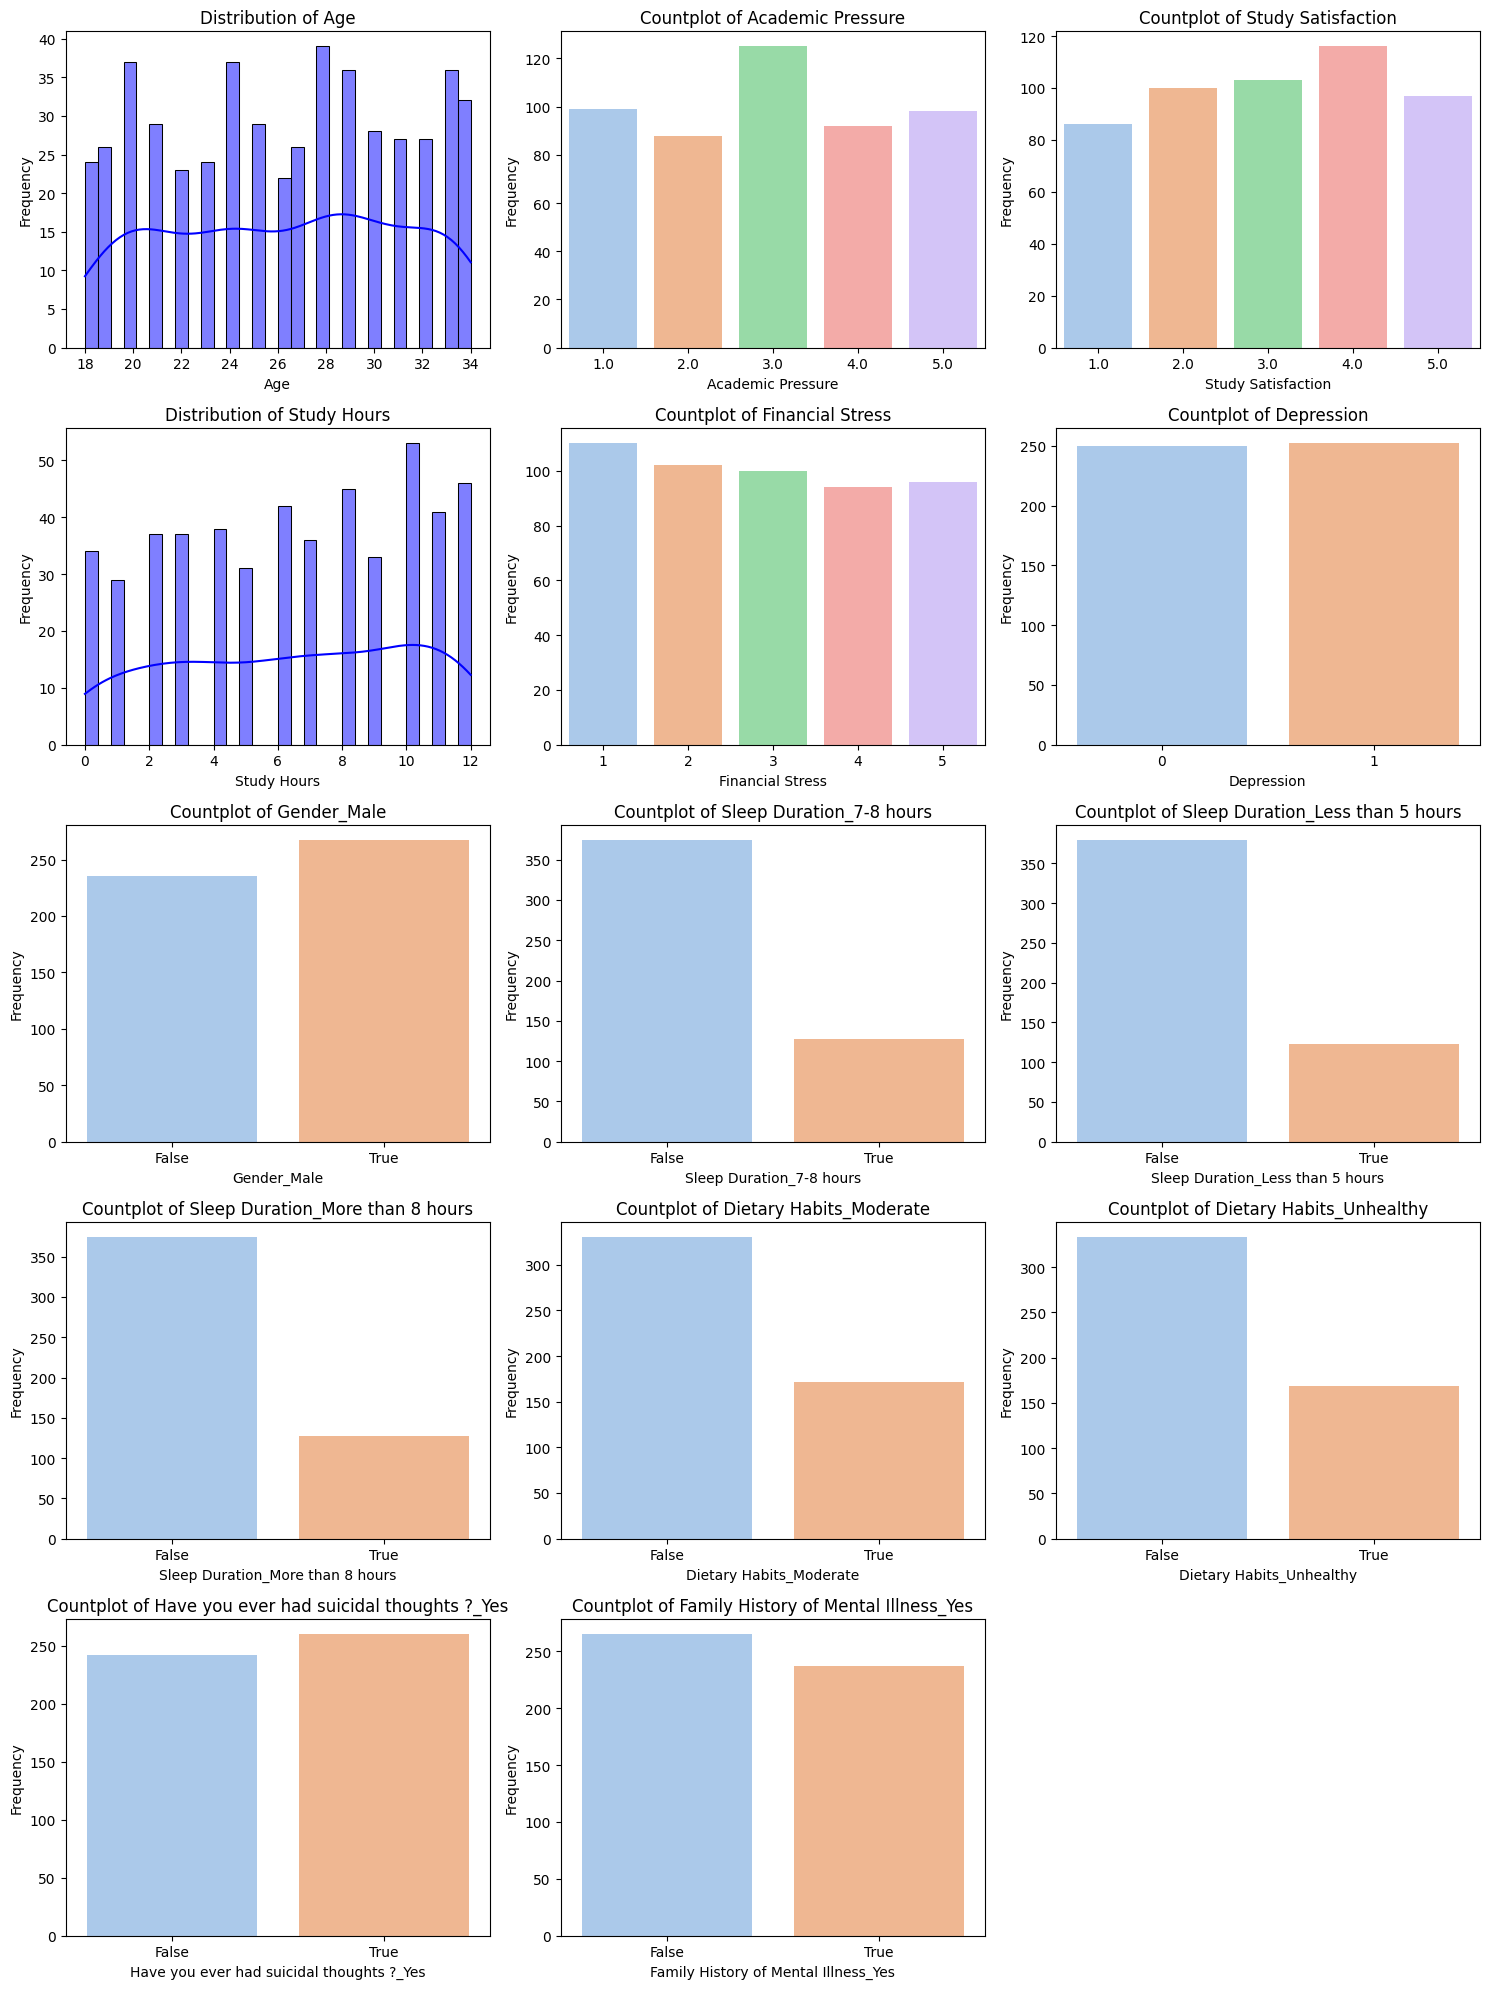

In [10]:
# Set the number of rows and columns for the grid
num_columns = 3  # Number of plots per row
num_rows = (len(df1_encoded.columns) + num_columns - 1) // num_columns  # Calculate the number of rows dynamically

# Set up the figure and axes
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 4))
axes = axes.flatten()

# Plot each column in the grid
for i, column in enumerate(df1_encoded.columns):
    ax = axes[i]
    if df1_encoded[column].nunique() > 10:  # For continuous variables
        sns.histplot(df1_encoded[column], kde=True, bins=30, color="blue", ax=ax)
        ax.set_title(f'Distribution of {column}')
    else:  # For categorical/encoded variables
        sns.countplot(x=df1_encoded[column], palette="pastel", ax=ax)
        ax.set_title(f'Countplot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


- some of the get dummies columns have unbalanced amounts of trues/falses but besides that the rest of the features are relatively normally distrbuted so nothing will really need to be done to address this

#### 5) Checking for outliers in the data 

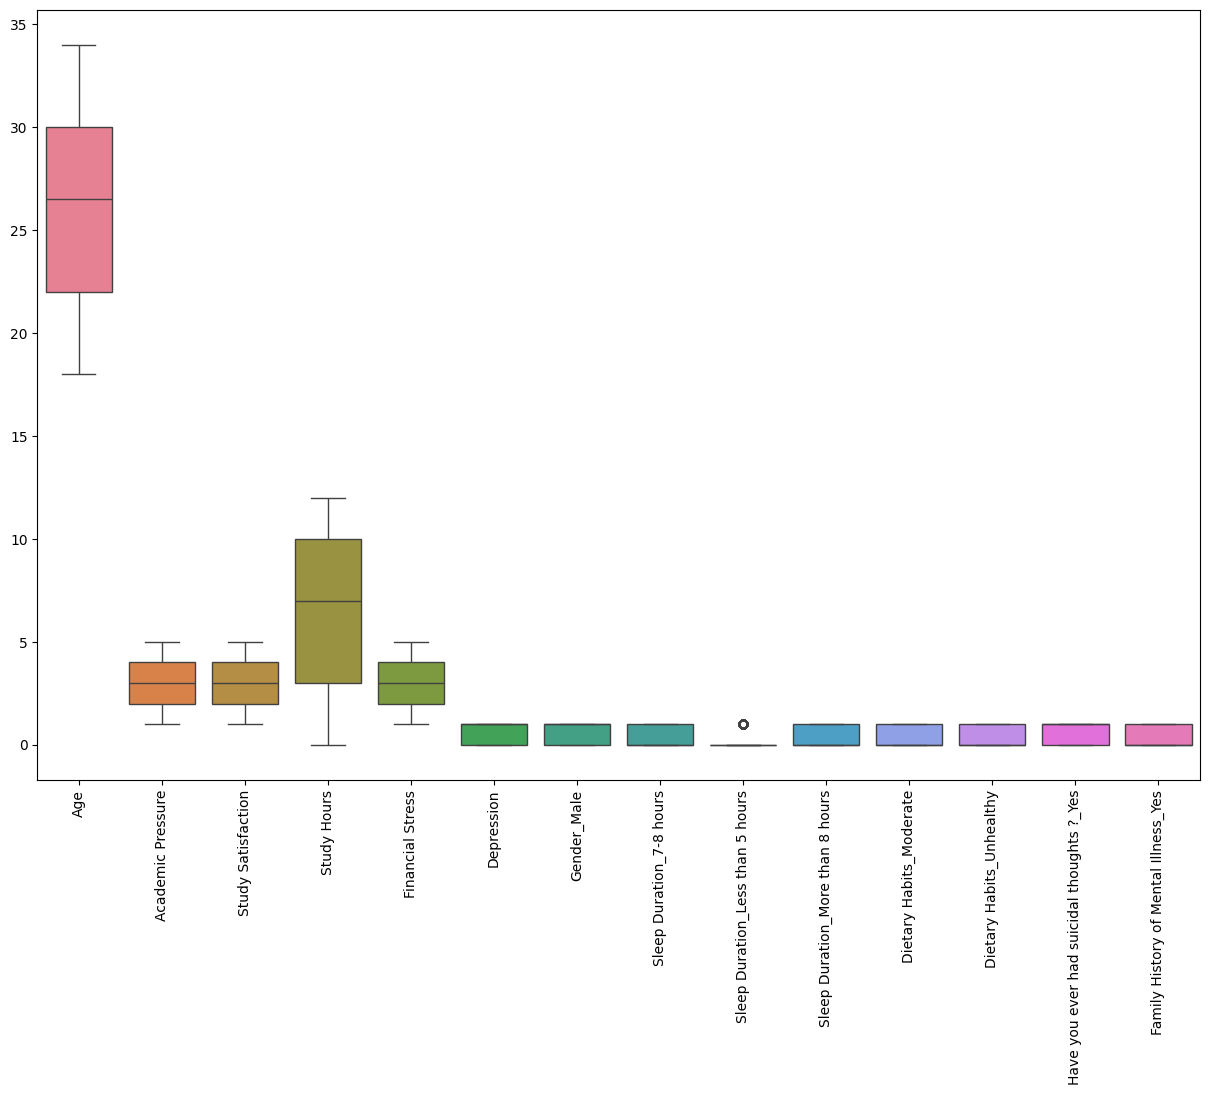

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(15, 10))
# boxplot to check outliers for all columns
sns.boxplot(data=df1_encoded)
# Rotating x-axis labels for better readability
plt.xticks(rotation=90)
# Shows the plot
plt.show()


- The boxplot indicates that there are no clear signs of outliers in the data, as there are no extended whiskers or isolated points (indicated by the circles above the boxes)

# Setting Up The Linear Regression Model

#### 1) Feature importance to determine which factors will be the most impactful for our model 

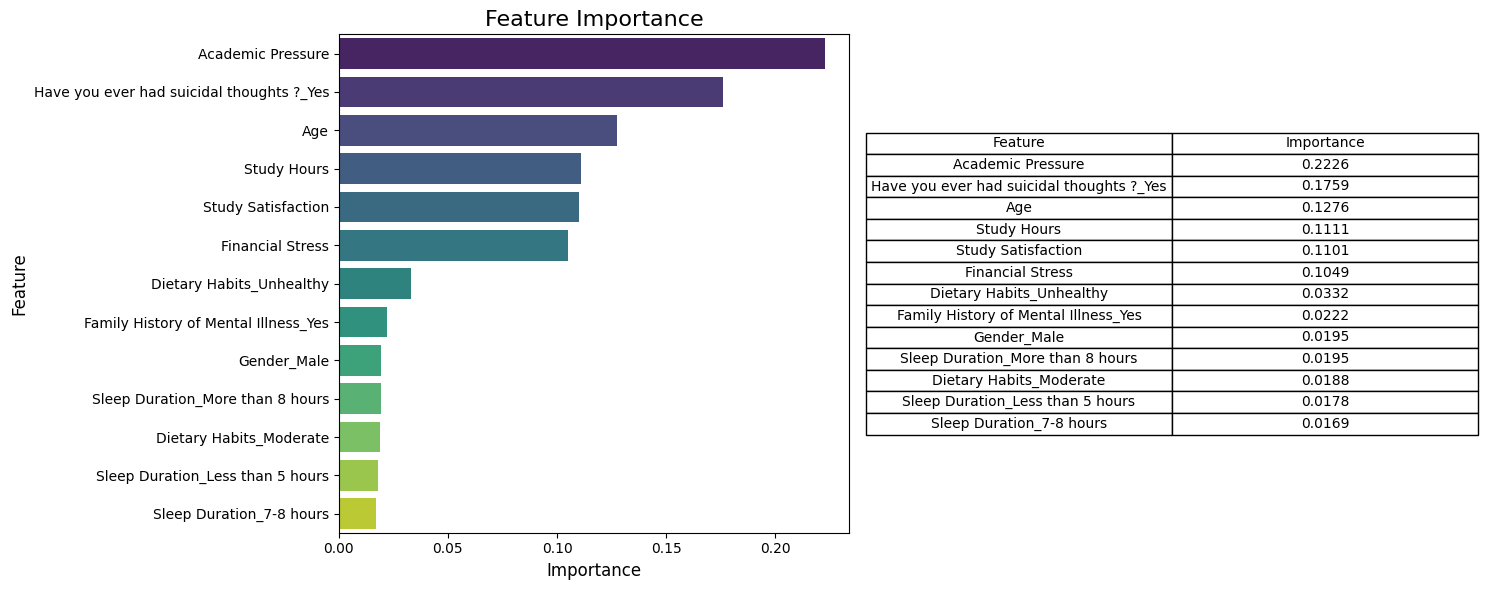

In [12]:
# Initialize a RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Fit the model on the data (excluding the target column "Depression")
X = df1_encoded.drop('Depression', axis=1)
y = df1_encoded['Depression']
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# DataFrame for better readability
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Round the importance values to 4 decimal places (so that it is easier to read)
importances_df['Importance'] = importances_df['Importance'].round(4)

# Sorting them by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Creating a plot to visualize the feature importance that we can include in the project if we need to
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot for the feature importance
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis', ax=ax[0])
ax[0].set_title('Feature Importance', fontsize=16)
ax[0].set_xlabel('Importance', fontsize=12)
ax[0].set_ylabel('Feature', fontsize=12)

# Table for feature importance values
ax[1].axis('off')  # this hides the axes for the table
table = ax[1].table(cellText=importances_df.values, colLabels=importances_df.columns, loc='center', cellLoc='center')

# Customizing the table to make it look better
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Shows the plots
plt.tight_layout()
plt.show()


In [13]:
print(importances_df)

                                      Feature  Importance
1                           Academic Pressure      0.2226
11  Have you ever had suicidal thoughts ?_Yes      0.1759
0                                         Age      0.1276
3                                 Study Hours      0.1111
2                          Study Satisfaction      0.1101
4                            Financial Stress      0.1049
10                   Dietary Habits_Unhealthy      0.0332
12       Family History of Mental Illness_Yes      0.0222
5                                 Gender_Male      0.0195
8            Sleep Duration_More than 8 hours      0.0195
9                     Dietary Habits_Moderate      0.0188
7            Sleep Duration_Less than 5 hours      0.0178
6                    Sleep Duration_7-8 hours      0.0169


- This shows that the following features : "academic pressure", "have you ever had suicidal thoughts?_Yes" (one hot encoding changed this into two columns yes/no), "age", "study hours", "study satisfaction", and "financial stress" have the most impact on the target variable because of this, these previously mentioned features will be the ones used as predictors in the linear regression model.
- also notable takeaway as that out of these features determined to be the most important, 3 out of the 6 features are all related to school which perhaps indicates that school has a lot of weight on someones mental state (this can be touched on in the impact/takeaways section)

#### 2) Seperating the predictor and target variables
- As determined previously the six predictors will be : 
    1) Academic Pressure
    2) Have you ever had suicidal thoughts ?_Yes
    3) Age
    4) Study Hours
    5) Study Satisfaction
    6) Financial Stress
- The target variable that we will be trying to predict will be : **Depression**

In [14]:
# Selecting the top 6 features based on the feature importance values
top_features = [
    'Academic Pressure',
    'Have you ever had suicidal thoughts ?_Yes',
    'Age',
    'Study Hours',
    'Study Satisfaction',
    'Financial Stress'
]
# Seperating the X (predictors) and y (target) variables
X = df1_encoded[top_features]  # Predictors
y = df1_encoded['Depression']  # Target variable

#### 3) Setting up the training and testing sets with this data

In [15]:
# Prepare the data with selected features
X = df1_encoded[top_features]
y = df1_encoded['Depression']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 4) Creating the model 

In [16]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

#### 5) Evaluating the model 

In [28]:
# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Print the results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'F1-Score: {f1:.4f}')

Precision: 0.9455
Recall: 0.9811
Accuracy: 0.9604
F1-Score: 0.9630


1. **Precision** (0.9455)
    -  Precision measures how many of the predicted positive instances were actually positive. In your case, approximately 94.55% of the instances that your model predicted as positive were indeed positive.
    - High precision indicates that the model is good at avoiding false positives, i.e., it doesn't often predict the positive class when it's not actually positive.
2. **Recall** (0.9811)
    - Recall measures how many of the actual positive instances were correctly identified by the model. In your case, 98.11% of the actual positive instances were correctly identified as positive.
    - High recall suggests that the model is good at identifying most of the positive instances, minimizing false negatives.
3. **Accuracy** (0.9604)
    - Accuracy is the overall percentage of correct predictions (both positive and negative) out of all predictions. Your model correctly predicted the target variable 96.04% of the time.
    - While accuracy gives an overall sense of how the model is performing, it can sometimes be misleading, especially in cases of class imbalance. In this case, since both precision and recall are high, accuracy is also a reliable metric here.
4. **F1-Score** (0.9630)
    - F1-Score is the harmonic mean of precision and recall. It gives a balance between precision and recall, especially when there's an imbalance between the two. Your F1-Score of 0.9630 indicates that the model performs very well at balancing precision and recall, which is critical in scenarios where both false positives and false negatives are important to minimize.

**Summary** 
- Precision and Recall are both very high, suggesting the model is accurate in predicting positive cases without missing too many, and also avoids false positives well.
-  Accuracy is also high, indicating that the model is generally making correct predictions overall.    
- The F1-Score confirms that the balance between precision and recall is strong, which is important when both false positives and false negatives carry significant consequences. 

In [17]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 0.2309
Mean Squared Error (MSE): 0.0761
Root Mean Squared Error (RMSE): 0.2758
R-squared (R²): 0.6950


1. **Mean Absolute Error (MAE)**: 0.2309
    - Interpretation: The MAE represents the average absolute difference between the predicted values and the actual values. In this case, the model's average error is about 0.231. This means that, on average, the model’s predictions deviate from the actual values by approximately 0.231 units.
    - Implication: A lower MAE generally indicates better model performance. The value of 0.231 suggests that the model is making relatively small errors, but it can be improved further depending on the application.
2. **Mean Squared Error (MSE)**: 0.0761
    - Interpretation: MSE measures the average squared difference between the predicted and actual values. Larger errors are penalized more heavily due to the squaring of differences. In this case, the MSE is 0.0761.
    - Implication: Like MAE, a smaller MSE indicates better performance, but MSE gives more weight to larger errors. Since MSE is relatively small, this suggests that the model isn't making large prediction errors in general.
3. **Root Mean Squared Error (RMSE)**: 0.2758
    - Interpretation: RMSE is the square root of the MSE and represents the average error in the same units as the target variable. The RMSE for your model is 0.276.
    - Implication: RMSE is particularly useful for understanding the magnitude of error in a way that is easier to interpret in the context of the original data (because it is in the same units). The model has an RMSE of 0.276, meaning that the average error is about 0.276 units in terms of the dependent variable.
4. **R-squared (R²)**: 0.6950
    - Interpretation: R² measures the proportion of variance in the dependent variable that is explained by the independent variables in the model. In this case, the R² value is 0.6950, or approximately 69.5%.
    - Implication: This means that about 69.5% of the variation in the dependent variable can be explained by the features in the model. Generally, an R² value of 0.695 indicates that the model is doing a fairly good job of explaining the variability in the data, though there is still 30.5% of the variation unexplained, which might be attributed to factors not included in the model or inherent variability.


**Summary**:
- The model has a decent performance, with an R² of 0.695, meaning it explains 69.5% of the variance in the target variable.
The MAE (0.2309) and RMSE (0.2758) suggest that the model's errors are relatively small and moderate, indicating that its predictions are fairly close to the actual values on average.
The MSE (0.0761) confirms that the errors are not large.

#### 6) Visualizing the outcome using a confusion matrix

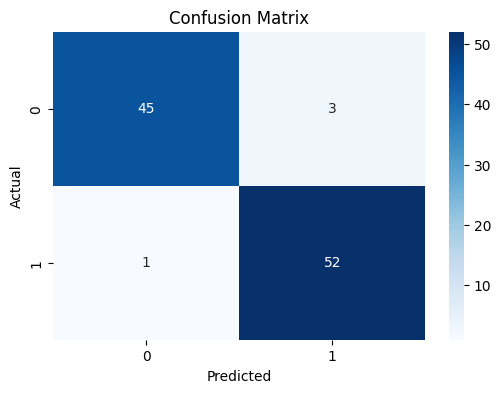

In [21]:
# Convert continuous predictions to binary values using a threshold of 0.5
y_pred_binary = (y_pred >= 0.5).astype(int)

# Now compute the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Setting up the K-Means Clustering Model

#### 1) Scale the Data to be ready to use (using the same features as the linear model for comparison sake)

In [ ]:
# this is the same as the code above but with the top 6 features
top_features = [
    'Academic Pressure',
    'Have you ever had suicidal thoughts ?_Yes',
    'Age',
    'Study Hours',
    'Study Satisfaction',
    'Financial Stress'
]

X = df1_encoded[top_features]  # Predictors
y = df1_encoded['Depression']  # Target variable

# Scaling the data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)  # Standardizing the selected features


#### 2) Determining the number of clusters using by using the "Elbow Method"

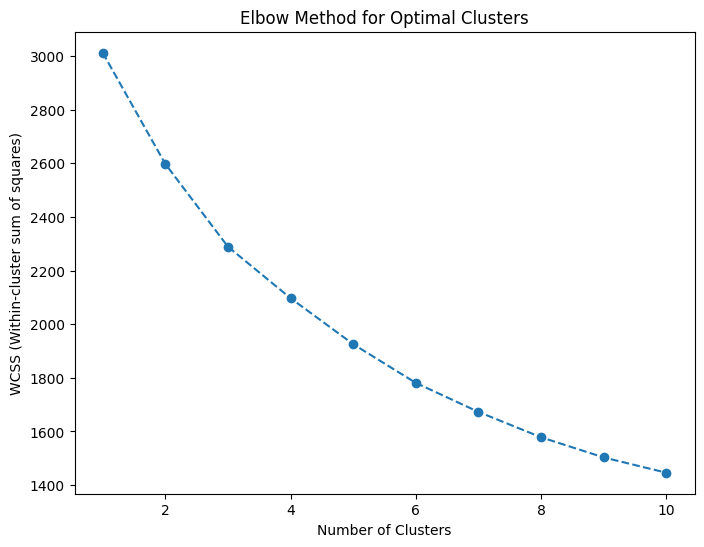

In [ ]:
# Elbow method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_X)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()


- In this plot, look for the "elbow" point where the WCSS starts to decrease more slowly, which indicates the optimal number of clusters.
- It is not the most obvious with this data but we will choose K=3 becuase the third point to the fourth point, the slop begans to level out a bit compared to the previous points
- Although the elbow method indicates that 3 would be the best on second note since we are predicting a boolean yes/no value perhaps having just two clusters would be more impactful for what we are trying to prove with this problem so therefore we will just use k=2 to represent the yes/no instead of the k=3 that the elbow method indicates

#### 4) Fitting the K-Means Model

In [44]:
# Fitting the K-means model with k=3
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(scaled_X)

# Assign the cluster labels to df1_encoded
df1_encoded['Cluster'] = kmeans.labels_

#### 5) Visualizing the clusters

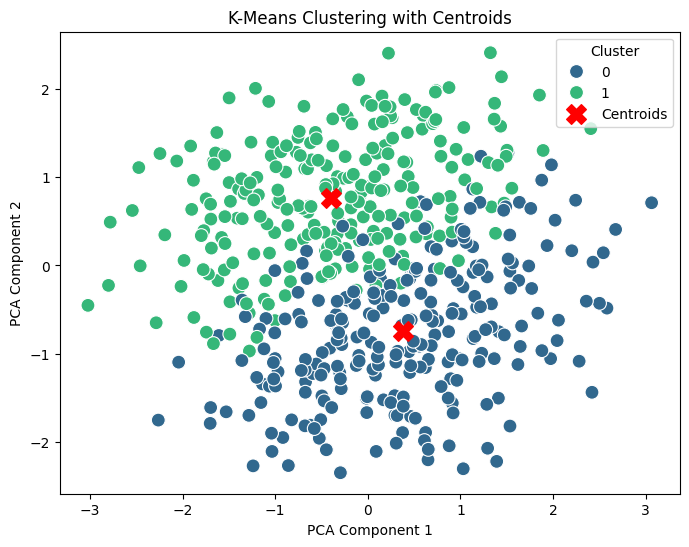

In [47]:
# Reduce the data to 2D using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_X)

# Get the centroids of the clusters in the 2D PCA space
centroids = pca.transform(kmeans.cluster_centers_)

# Plot the clusters
plt.figure(figsize=(8, 6))

# Scatter plot of the points colored by their cluster
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df1_encoded['Cluster'], palette='viridis', s=100, alpha=1)

# Plot the centroids as red X markers
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

# Add labels and title
plt.title('K-Means Clustering with Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Show legend
plt.legend(title='Cluster')
plt.show()


#### 6) Evaluating the performance of the K-Means model using Silhouette Score and Inertia 

In [48]:
from sklearn.metrics import silhouette_score

# Compute the Silhouette Score
sil_score = silhouette_score(scaled_X, kmeans.labels_)
print(f'Silhouette Score: {sil_score}')

# Compute the Inertia (sum of squared distances of samples to their closest cluster center)
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')


Silhouette Score: 0.13374443760258609
Inertia: 2597.248104463443


**Silhouette Score**: 0.1337

- The Silhouette Score ranges from -1 to 1, where:
    - A value close to 1 means that the data points are well-clustered (i.e., they are close to the center of their own cluster and far from the centers of other clusters).
    - A value close to 0 indicates that the data points are on the border between clusters.
- A score of 0.1337 is relatively low, suggesting that the clustering might not be very well-defined. This indicates that the clusters may not be distinct enough, and the algorithm may have trouble separating the data points in a meaningful way.

**Inertia**: 2597.2481

- Inertia is the sum of squared distances of samples to their closest cluster center. A lower inertia indicates that the data points are closer to their cluster centroids, which typically means better clustering.
- Higher inertia suggests that the clusters are not very tight (the points are farther from the centroids).

Impact 

Depression among students is a critical concern, with far-reaching consequences for academic performance, personal well-being, and societal progress. This dataset provides an opportunity to analyze the complex interplay of factors influencing depression, such as academic pressure, sleep duration, financial stress, and family history of mental illness.

Insights derived from this project could guide the development of evidence-based interventions, addressing key stressors and promoting mental health resilience among students. For example, identifying the role of academic satisfaction and dietary habits in mitigating depression could inform strategies for healthier campus environments and personalized student support services.

Furthermore, the dataset's inclusion of sensitive indicators such as suicidal thoughts underscores its potential to inform early detection and prevention efforts. Educational institutions could leverage these insights to implement proactive mental health screenings and tailored counseling programs.

On a broader scale, this research can contribute to destigmatizing mental health issues in academic settings, fostering a culture where students feel supported and empowered to seek help. By addressing these challenges, this work has the potential to reduce dropout rates, improve academic outcomes, and enhance the overall quality of life for students, ultimately shaping a more empathetic and productive society.